# Coursera "IBM Applied Data Science Capstone" Project -- Week 5

## Best Neighborhood to Operate a Restaurant in Amsterdam

### Introduction:

This project is a "Capstone Project" of Coursera - "IBM Applied Data Science Capstone Course" in the fourth/fifth weeks. In this project, we want to determine the best neighborhood in Amsterdam for the entrepreneurs to open a new restaurant. In the project, we tried to use most of the python scripts, libraries, virtualization of data, foursquare api.. etc. 

Please, pay attention!... It is only a capstone final project and it is not claimed that the result of the project is 100% proper for trade and investing industry. On the other hand, it can be helpful in the decision process for the entrepreneurs and/or give an idea to make a comprehensive project to researchers.

### Description and Background of the Problem:

While starting the project, like in course duration, we decided to analyse an other famous, important and crowded city, Amsterdam. As we know Amsterdam is the capital city of Netherlands. We also learn from <a href="https://nl.wikipedia.org/wiki/Amsterdam">wikipedia</a>; "_the municipality of Amsterdam has 863,202 inhabitants (1 January 2019, CBS ). On the other hand, it is the fourth most visited city in Europe, around 17 million day trippers come to Amsterdam every year. Among the tourists are also many other museums , the coffee shops , __the restaurants__ and window prostitution in the Wallen (Red Light District) popular. The falling number of cafés is offset by a __sharply increasing number of restaurants since 2010__, not only in the center but also in the surrounding districts._"

As we know, choosing a neighborhood and location for a restaurant is an important and diffucult step for the entrepreneurs. Most of time it can be as crucial factor as menu quality and service for the restaurant's success. The neighborhood is not only an important factor for customers but also it affects the restaurant quality, including the menu, interior design, style of furnitures. 

So, the question (problem) is clear: <font color=red>Which neighborhood is suitable place for a new restaurant in Amsterdam?</font>

For finding the answer of the question, first of all, we need the key factors of selecting the location for a restaurant. After making some search in open source (of course Google!), we found an article 
<a href="https://www.thebalancesmb.com/choosing-a-location-for-your-restaurant-2888635">"4 Important Factors When Choosing a Location to Open a Restaurant"</a>. The article explain the 4 important factor shortly, which are;
- __Parking__<br>
A restaurant should has its own parking lot. If that isn’t an option (for example, in a major cities), consider partnering with a hotel in the area that has its own parking options. Also it has an acceptable distance to public parking lots.
- __Accessibility__<br>
There’s a reason that major restaurant chains are often located near highway exits: It makes them accessible for customers. Also it is a good option to close distance to public transportations. Light Rail Station, Metro Station, Train/Tram Station, Bus Stop around the restaurant is provide convenience for customers.
- __Visibility__<br>
This goes along with accessibility and is very important for new restaurant locations. People have to know the restaurant is there, either in person or on their mobile devices. 
- __Population Base__<br>
There need to be enough people who live in or pass through the area regularly to keep the restaurant busy. So "the particular area's population base" is another important factor about suitable place for a new restaurant.

As we mentioned before, Amsterdam has a very crowded city with huge number of tourists. So we can eliminate the fourth factor (Population Base). The third factor (Visibility) is not easy to keep in view, because it needs different type of data like usage density of every streets, frequently prefered routas and the prefered reason... etc. May be a field research is also needed. Anyway, because of the diffuculties, we focused on first two factors (Parking and Accessibility) and collected data about them.

### Description of the Data:

For solving the problem, it is clear that we need different type of data. Which are: 
1. List of neighborhoods of Amsterdam
2. Car Parking list and their geolocations of Amsterdam
3. Light Rail/Metro/Train/Tram/Bus Station list and their geolocations of Amsterdam

While searching in open source, we reach the "Statistics Netherlands" <a href="https://opendata.cbs.nl/#/CBS/en/navigatieScherm/thema"> (Centraal Bureau voor de Statistiek-CBS)</a> web site, where publishes formal, regular statistical datasets in various issues. we got the first and fourth datasets from there.

The second and third datasets are POI and it is easy to reach them by Foursquare API. So we tried to get the data via Foursquare API. 

The important disadvantage of API is the response limit of queries. In every query, the response of venues list limited as 100 result. So, we tried to send query with sub-categoryIDs of venues' <a href="https://developer.foursquare.com/docs/resources/categories">(which is exist in Foursquare web site)</a> and update the dataframe with "for loop" easily. we explained this detail later also.

### Table of Contents:

Introduction<br>
Description and Background of the Problem<br>
Description of the Data<br>
The Steps of the Project<br>
> 1) Download and Explore Dataset<br>
> 2) Show Neighborhoods of Amsterdam on Map<br>
> 3) Create DataSets For Comparison<br>
> 4) Arrange The DataFrames<br>
> 5) Comparison of Neighborhoods

Result of the Project<br>
Discussion about the Project<br>
Conclusion of the Project<br>
Presentation of the Project

### The Steps of the Project:

First of, all we import the required libraries 

In [1]:
import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.distance import geodesic
from statistics import mean
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None # disable chained assignments
print('Required libraries imported.')

Required libraries imported.


#### 1. Download and Explore Dataset

For determining the best neighborhood in Amsterdam, first of all we need the boroughs and neighborhoods list of the Amsterdam. Also we need the latitude and logitude coordinates of each neighborhoods. 

After marking a small search on Google, we reach a public <a href="https://claircitydata.cbs.nl/dataset/689ded75-1a80-4259-b033-63913573c13a/resource/d02c5f12-1cfa-4d7c-91d3-41af8e4ed634/download/wijken_buurten.csv"> "Districts and Neighbourhoods Amsterdam"</a> dataset. It is free and public dataset that produced by the "Statistics Netherlands" <a href="https://opendata.cbs.nl/#/CBS/en/navigatieScherm/thema"> (Centraal Bureau voor de Statistiek-CBS)</a>.

In [2]:
filename = "https://claircitydata.cbs.nl/dataset/689ded75-1a80-4259-b033-63913573c13a/resource/d02c5f12-1cfa-4d7c-91d3-41af8e4ed634/download/wijken_buurten.csv"
#df_amsterdam_data= pd.read_csv(filename,delimiter=',')
df_amsterdam_data=pd.read_csv('wijken_buurten.csv',delimiter=',')
df_amsterdam_data.shape

(579, 37)

As we see the result, in dataset; 579 row and 37 column exist.<br>
Firstly, we want know the details of data:

In [3]:
list(df_amsterdam_data.columns) 

['subject',
 'region_name',
 'regio_type',
 'region_code',
 'ninhabitants',
 'nmen',
 'nwomen',
 'nage_0_to_15',
 'nage_15_to_25',
 'nage_25_to_45',
 'nage_45_to_65',
 'nage_65_older',
 'nunmarried',
 'nmarried',
 'ndivorced',
 'nwidowed',
 'nimmigrant_western',
 'nimmigrant_nonwestern',
 'nimmigrant_marokko',
 'nimmigrant_antiles_aruba',
 'nimmigrant_surinam',
 'nimmigrant_turkey',
 'nimmigrant_other_non_western',
 'nhouseholds',
 'nhh_single_person',
 'nhh_no_children',
 'nhh_with_children',
 'ave_househ_size',
 'populatio_density',
 'area_total',
 'area_land',
 'area_water',
 'urbanisation_grade',
 'address_density',
 'geojson',
 'lon',
 'lat']

There is an important column exist which is named "regio_type". <br>
So, we want to know the details of this data too

In [4]:
df_amsterdam_data['regio_type'].value_counts()

Buurt       479
Wijk         99
Gemeente      1
Name: regio_type, dtype: int64

Secondly, we limit the "regio_type" with "Buurt" (__Neighborhood__)

In [5]:
df_amsterdam_data=df_amsterdam_data[df_amsterdam_data['regio_type']=='Buurt']
df_amsterdam_data.shape

(479, 37)

In [6]:
df_amsterdam_data.head()

,subject,region_name,regio_type,region_code,ninhabitants,nmen,nwomen,nage_0_to_15,nage_15_to_25,nage_25_to_45,...,ave_househ_size,populatio_density,area_total,area_land,area_water,urbanisation_grade,address_density,geojson,lon,lat
2,Kop Zeedijk,Amsterdam,Buurt,BU03630000,1020,570,445,50,140,520,...,1.4,16818.0,8,6,2,1.0,6649.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.900280,52.375937
3,Oude Kerk e.o.,Amsterdam,Buurt,BU03630001,670,365,300,30,130,320,...,1.3,7615.0,9,9,0,1.0,7361.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.896156,52.373793
4,Burgwallen Oost,Amsterdam,Buurt,BU03630002,1610,880,730,120,250,755,...,1.4,25867.0,7,6,1,1.0,7544.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.898757,52.372815
5,Nes e.o.,Amsterdam,Buurt,BU03630003,370,185,180,25,70,195,...,1.4,6939.0,6,5,0,1.0,9825.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.893728,52.370861
6,BG-terrein e.o.,Amsterdam,Buurt,BU03630004,605,330,270,45,85,250,...,1.4,7157.0,10,8,2,1.0,8428.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.895584,52.369546


Then, after arrange the rows, we want to arrange the column too. <br>
For focusing the column which we needs, we limited the columns with 'subject','region_name','lon','lat'.

In [7]:
df_amsterdam_data=df_amsterdam_data[['subject','region_name','lon','lat']]
df_amsterdam_data.head()

,subject,region_name,lon,lat
2,Kop Zeedijk,Amsterdam,4.900280,52.375937
3,Oude Kerk e.o.,Amsterdam,4.896156,52.373793
4,Burgwallen Oost,Amsterdam,4.898757,52.372815
5,Nes e.o.,Amsterdam,4.893728,52.370861
6,BG-terrein e.o.,Amsterdam,4.895584,52.369546


Fourthly, we arrange the column names and reindex the dataframe
Also, create 2 new columns, which we use them in the later on for comparing the neighborhoods

In [8]:
df_amsterdam_data.rename(columns={'subject': 'Neighborhood', 'region_name':'City','lon':'Longitude', 'lat':'Latitude'},inplace=True)
df_amsterdam_data['CarPark_Dist']=0
df_amsterdam_data['Close_Bus/Train']=0
df_amsterdam = df_amsterdam_data[['Neighborhood', 'City', 'Latitude','Longitude','CarPark_Dist','Close_Bus/Train']].reset_index(drop=True)
df_amsterdam.head()

,Neighborhood,City,Latitude,Longitude,CarPark_Dist,Close_Bus/Train
0,Kop Zeedijk,Amsterdam,52.375937,4.900280,0,0
1,Oude Kerk e.o.,Amsterdam,52.373793,4.896156,0,0
2,Burgwallen Oost,Amsterdam,52.372815,4.898757,0,0
3,Nes e.o.,Amsterdam,52.370861,4.893728,0,0
4,BG-terrein e.o.,Amsterdam,52.369546,4.895584,0,0


That is all! The data (neighborhoods of Amsterdam) is ready...

#### 2. Show Neighborhoods of Amsterdam on Map

For showing the locations of Neighborhoods on map, we need the coordinate (latitude and longitude) of Amsterdam first. We use __geopy library__ to get the latitude and longitude values of Amsterdam.<br>
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent "_myapplication_", as shown below.

In [9]:
address = 'Amsterdam'
geolocator = Nominatim(user_agent="myapplication")
location = geolocator.geocode(address)
ams_latitude = location.latitude
ams_longitude = location.longitude
print(f'The geograpical coordinate of Amsterdam is: {ams_latitude}, {ams_longitude}')

The geograpical coordinate of Amsterdam is: 52.3727598, 4.8936041


Now, we can create a map of Amsterdam with neighborhoods.

In [11]:
# create map
map_amsterdam = folium.Map(location=[ams_latitude, ams_longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_amsterdam['Latitude'], df_amsterdam['Longitude'], df_amsterdam['City'], df_amsterdam['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_amsterdam)  
    
map_amsterdam

#### 3. Create DataSets For Comparison

We need 2 datasets for comparison between the neighborhoods. As we explained in "_Description of the Data_" section, we need; 
- Car Parking list and their geolocations of Amsterdam
- Light Rail/Metro/Train/Tram/Bus Station list and their geolocations of Amsterdam<br>

We can get these datas via Foursquare Api.
Firstly, we establish the Foursquare Api.

In [12]:
CLIENT_ID =  'UPNPKZ2SOP120EV3UL5RKQVIACYKJIKWTHWA3KD11TRLVWWW'# Foursquare ID
CLIENT_SECRET ='55P00A1CWCQQ00UK2QYJYRPQZB1USYUM0OLQE5PN5OIMWPFT' # Foursquare Secret
VERSION = '20180604'
LIMIT = 100 #response limit
print('Foursquare Credentails is:\nCLIENT ID\t:',CLIENT_ID,'\nCLIENT SECRET\t:',CLIENT_SECRET)

Foursquare Credentails is:
CLIENT ID	: UPNPKZ2SOP120EV3UL5RKQVIACYKJIKWTHWA3KD11TRLVWWW 
CLIENT SECRET	: 55P00A1CWCQQ00UK2QYJYRPQZB1USYUM0OLQE5PN5OIMWPFT


__DataSet of Parking Lots__

We can reach __Parking Lots Locations__ via Foursquare Api with _Parking CategaoryId_. In <a href="https://developer.foursquare.com/docs/resources/categories">Foursquare</a> web site, we learned that the categoryId of Parking is "4c38df4de52ce0d596b336e1".

In [13]:
# some defination
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 3000 # define radius
categoryId='4c38df4de52ce0d596b336e1' #categoryId of Parking

#create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ams_latitude, 
    ams_longitude, 
    radius,
    categoryId,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=UPNPKZ2SOP120EV3UL5RKQVIACYKJIKWTHWA3KD11TRLVWWW&client_secret=55P00A1CWCQQ00UK2QYJYRPQZB1USYUM0OLQE5PN5OIMWPFT&v=20180604&ll=52.3727598,4.8936041&radius=3000&categoryId=4c38df4de52ce0d596b336e1&limit=100'

Send the GET request and examine the resutls

In [14]:
results = requests.get(url).json()
results 

{'meta': {'code': 200, 'requestId': '612d2a2b4574c86ec2f211c6'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Amsterdam',
  'headerFullLocation': 'Amsterdam',
  'headerLocationGranularity': 'city',
  'query': 'parking',
  'totalResults': 91,
  'suggestedBounds': {'ne': {'lat': 52.399759827000025,
    'lng': 4.937746038915355},
   'sw': {'lat': 52.34575977299997, 'lng': 4.849462161084645}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b531b3ef964a520208f27e3',
       'name': 'Q-Park De Bijenkorf',
       'location': {'address': 'Beursstraat 15',
        'lat': 52.37413161763709,
        'lng': 4.8945793955019345,
        'labeledLatLngs': [{'label': 'display',
          'lat'

Before we proceed, let's borrow the __get_category_type__ function from the Foursquare

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json data and structure it into a pandas dataframe as __df_park__.

In [16]:
parking = results['response']['groups'][0]['items']
    
df_park = json_normalize(parking) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_park =df_park.loc[:, filtered_columns]

# filter the category for each row
df_park['venue.categories'] = df_park.apply(get_category_type, axis=1)


# clean columns
df_park.columns = [col.split(".")[-1] for col in df_park.columns]

df_park.head()

,name,categories,lat,lng
0,Q-Park De Bijenkorf,Parking,52.374132,4.894579
1,MobyPark - Parking Dam Square - Book now and p...,Parking,52.373077,4.895563
2,Parkeergarage Geelvinck,Parking,52.366379,4.891984
3,Q-Park De Kolk,Parking,52.376267,4.894437
4,ParkBee Grand Hotel Krasnapolsky,Parking,52.373005,4.895601


And we can print the __parking lots number__ in dataframe <br>(venues returned by Foursquare)

In [17]:
print('{} parking lots were returned by Foursquare.'.format(df_park.shape[0]))

88 parking lots were returned by Foursquare.


We can save the dataframe as csv. <br>
It is optional...

In [18]:
df_park.to_csv('park_amsterdam.csv')

__DataSet of Bus/Train Stops__

We can reach __Bus/Train Stops Locations__ via Foursquare Api with _CategaoryId_. In <a href="https://developer.foursquare.com/docs/resources/categories">Foursquare</a> web site, we learned that the categoryIds as;

- Light Rail Station categoryId is "4bf58dd8d48988d1fc931735"
- Metro Station categoryId is "4bf58dd8d48988d1fd931735"
- Tram Station categoryId is "52f2ab2ebcbc57f1066b8b51"
- Bus Station categoryId is "4bf58dd8d48988d1fe931735"


As we know, the important disadvantage of Foursquare API is the response limit (the number of venues returned by Foursquare API has a maximum limit is 100) of queries. Because of there are more than 100 Bus/Train Stops in Amsterdam, we tried to send query with sub-categoryIDs of venues and update the dataframe with "for loop" easily. 

Firstly, we create the Bus/Train Stops categoryID List:

In [19]:
#create the Bus/Train Stops categoryID List:
category_list=['4bf58dd8d48988d1fc931735','4bf58dd8d48988d1fd931735','52f2ab2ebcbc57f1066b8b51','4bf58dd8d48988d1fe931735'] #bus/train station
c=0
df_trans_tot=pd.DataFrame()

For get the more than 100 response via Foursquare, we send 4 different categoryID in a _for loop_. We create a a pandas dataframe as df_trans and update them into new a pandas dataframe as __df_trans_tot__.

In [20]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 3000 # define radius

   
#Create a for loop
for c in range(len(category_list)):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ams_latitude, 
    ams_longitude, 
    radius,
    category_list[c],
    LIMIT)
    print(url) #check the URLs
    
    #Send the GET request and examine the resutls    
    results = requests.get(url).json()  
    transportation = results['response']['groups'][0]['items']
    df_trans = json_normalize(transportation) # flatten JSON  
   
    # function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']

        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']
    
## Now we are ready to clean the json data and structure it into a pandas dataframe as df_trans
    
    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    df_trans =df_trans.loc[:, filtered_columns]
    
    # filter the category for each row
    df_trans['venue.categories'] = df_trans.apply(get_category_type, axis=1)
    
    # clean columns
    df_trans.columns = [col.split(".")[-1] for col in df_trans.columns]

    print('For Category ID {} : {}'.format(category_list[c], df_trans.shape))
    
    # Update the dataframe
    df_trans_tot=df_trans_tot.append(df_trans).reset_index(drop=True)

https://api.foursquare.com/v2/venues/explore?&client_id=UPNPKZ2SOP120EV3UL5RKQVIACYKJIKWTHWA3KD11TRLVWWW&client_secret=55P00A1CWCQQ00UK2QYJYRPQZB1USYUM0OLQE5PN5OIMWPFT&v=20180604&ll=52.3727598,4.8936041&radius=3000&categoryId=4bf58dd8d48988d1fc931735&limit=100
For Category ID 4bf58dd8d48988d1fc931735 : (1, 4)
https://api.foursquare.com/v2/venues/explore?&client_id=UPNPKZ2SOP120EV3UL5RKQVIACYKJIKWTHWA3KD11TRLVWWW&client_secret=55P00A1CWCQQ00UK2QYJYRPQZB1USYUM0OLQE5PN5OIMWPFT&v=20180604&ll=52.3727598,4.8936041&radius=3000&categoryId=4bf58dd8d48988d1fd931735&limit=100
For Category ID 4bf58dd8d48988d1fd931735 : (15, 4)
https://api.foursquare.com/v2/venues/explore?&client_id=UPNPKZ2SOP120EV3UL5RKQVIACYKJIKWTHWA3KD11TRLVWWW&client_secret=55P00A1CWCQQ00UK2QYJYRPQZB1USYUM0OLQE5PN5OIMWPFT&v=20180604&ll=52.3727598,4.8936041&radius=3000&categoryId=52f2ab2ebcbc57f1066b8b51&limit=100
For Category ID 52f2ab2ebcbc57f1066b8b51 : (100, 4)
https://api.foursquare.com/v2/venues/explore?&client_id=UPNPKZ2S

Let's see the __df_trans__ dataframe

In [21]:
df_trans.head()

,name,categories,lat,lng
0,Martelaarsgracht,Bus Station,52.377654,4.896091
1,City Sightseeing Bus,Bus Station,52.377835,4.897619
2,Busstation CS Stationsplein (C en D - GVB en C...,Bus Station,52.377502,4.901842
3,Cs Ijzijde,Bus Station,52.379289,4.901442
4,Busstation Amsterdam Centraal,Bus Station,52.379927,4.900199


And we can print the total Total Light Rail/Metro/Train/Tram/Bus Station number in dataframe 
(venues returned by Foursquare with for loop)

In [22]:
print('Total Light Rail/Metro/Train/Tram/Bus Station is:',df_trans_tot.shape[0])

Total Light Rail/Metro/Train/Tram/Bus Station is: 168


We can save the dataframe as csv.<br>
It is optional...

In [23]:
df_trans.to_csv('transportation_amsterdam.csv')

In [24]:
df_amsterdam.head()

,Neighborhood,City,Latitude,Longitude,CarPark_Dist,Close_Bus/Train
0,Kop Zeedijk,Amsterdam,52.375937,4.900280,0,0
1,Oude Kerk e.o.,Amsterdam,52.373793,4.896156,0,0
2,Burgwallen Oost,Amsterdam,52.372815,4.898757,0,0
3,Nes e.o.,Amsterdam,52.370861,4.893728,0,0
4,BG-terrein e.o.,Amsterdam,52.369546,4.895584,0,0


#### 4. Arrange The DataFrames

Now, we have 3 different DataFrames, which are;
- Neighborhoods (__df_amsterdam__)
- Parking Lots Locations (__df_park__)
- Bus/Train Stops Locations (__df_trans_tot__) 

In this step, we merge the dataframes.

Firstly, we calculate the average distance of all "_parking lot_" for each neighborhood. While we calculate the distance, we limit the distance with two digit after decimal point. 

Then, we add the result to the "CarPark_Dist" column of the __df_amsterdam__ dataframe.

In [37]:
#Average Distance Between Parking Lots and Neighborhoods
geolocator = Nominatim(user_agent="myapplication")
n=0
m=0
dist_list=[]
while True:
    if n < df_amsterdam['Neighborhood'].count():
        for m in range(df_park['name'].count()):
            location1=list(df_amsterdam.loc[n,'Latitude':'Longitude'])
            location2=list(df_park.loc[m,'lat':'lng'])
            dist=float('%.2f' % geodesic(location1,location2).m)
            dist_list.append(dist)
        #print('{} {} is: {} meters'.format(n+1,(df_amsterdam.loc[n,'Neighborhood']),('%.2f' % mean(dist_list)))
        df_amsterdam.loc[df_amsterdam.index[n], 'CarPark_Dist'] =('%.2f' % (mean(dist_list))) #Update The Neighborhood DataFrame
        df_amsterdam['CarPark_Dist']=pd.to_numeric(df_amsterdam['CarPark_Dist']) #Change the 'CarPark Dist' Column Type as float
        n+=1
    else:
        print('The average distance of all {} parking lots calculated for all {} neighborhoods and added to df_amsterdam dataframe'.format((df_park.shape[0]), df_amsterdam.shape[0]))
        break

The average distance of all 88 parking lots calculated for all 479 neighborhoods and added to df_amsterdam dataframe


Let's see the __df_amsterdam__ dataframe

In [38]:
df_amsterdam.head()

,Neighborhood,City,Latitude,Longitude,CarPark_Dist,Close_Bus/Train
0,Kop Zeedijk,Amsterdam,52.375937,4.900280,1567.02,57
1,Oude Kerk e.o.,Amsterdam,52.373793,4.896156,1512.28,63
2,Burgwallen Oost,Amsterdam,52.372815,4.898757,1491.38,64
3,Nes e.o.,Amsterdam,52.370861,4.893728,1467.07,55
4,BG-terrein e.o.,Amsterdam,52.369546,4.895584,1450.21,50


Secondly, we calculate the total 'Light Rail/Metro/Train/Tram/Bus Station number' for each neighborhood if the distance of stops below than 1.000 meters<br>
Then, we add the result to the "Close Bus/Train" column of the __df_amsterdam__ dataframe.

In [39]:
#Bus/Train Station Number in Neighborhood
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.distance import geodesic
from statistics import mean
geolocator = Nominatim(user_agent="myapplication")
n=0
m=0
p=0
while True:
    if n < df_amsterdam['Neighborhood'].count():
        for m in range(df_trans_tot['name'].count()):
            location1=list(df_amsterdam.loc[n,'Latitude':'Longitude'])
            location2=list(df_trans_tot.loc[m,'lat':'lng'])
            dist=float('%.2f' % geodesic(location1,location2).m)
            if dist<=1000: #We set 1000meter distance
                p+=1
        #print(n+1, df_amsterdam.loc[n,'Neighborhood'],'has:', p, 'close bus/train stop')
        df_amsterdam.loc[df_amsterdam.index[n], 'Close_Bus/Train'] = p #Update The Neighborhood DataFrame
        n+=1
        p=0
    else:
        print('The total number of all {} close Bus/Train stops for all {} neighborhood is calculated and added to df_amsterdam dataframe'.format((df_trans_tot.shape[0]), df_amsterdam.shape[0]))
        break

The total number of all 168 close Bus/Train stops for all 479 neighborhood is calculated and added to df_amsterdam dataframe


Let's see the __df_amsterdam__ dataframe

In [40]:
df_amsterdam.head()

,Neighborhood,City,Latitude,Longitude,CarPark_Dist,Close_Bus/Train
0,Kop Zeedijk,Amsterdam,52.375937,4.900280,1567.02,57
1,Oude Kerk e.o.,Amsterdam,52.373793,4.896156,1512.28,63
2,Burgwallen Oost,Amsterdam,52.372815,4.898757,1491.38,64
3,Nes e.o.,Amsterdam,52.370861,4.893728,1467.07,55
4,BG-terrein e.o.,Amsterdam,52.369546,4.895584,1450.21,50


#### 5. Comparison of Neighborhoods

In this step we can start to comparison of neighborhoods to determine the best suitable location for a new restaurant in Amsterdam.
We sort the neighborhods from the average distance of parking lots and create a new dataframe as __df_comparison__ with first 20 neighborhods.

In [41]:
df_amsterdam=df_amsterdam.sort_values('CarPark_Dist', ascending=True).reset_index(drop=True)
df_comparison=df_amsterdam.head(20)
df_comparison

,Neighborhood,City,Latitude,Longitude,CarPark_Dist,Close_Bus/Train
0,BG-terrein e.o.,Amsterdam,52.369546,4.895584,1450.21,50
1,Nes e.o.,Amsterdam,52.370861,4.893728,1467.07,55
2,Burgwallen Oost,Amsterdam,52.372815,4.898757,1491.38,64
3,Stationsplein e.o.,Amsterdam,52.379658,4.900724,1502.83,50
4,Kalverdriehoek,Amsterdam,52.367917,4.891315,1503.07,36
5,Leidsegracht Zuid,Amsterdam,52.366748,4.886283,1509.60,38
6,Reguliersbuurt,Amsterdam,52.366611,4.893200,1510.44,31
7,Begijnhofbuurt,Amsterdam,52.370704,4.891284,1512.24,37
8,Oude Kerk e.o.,Amsterdam,52.373793,4.896156,1512.28,63
9,Rembrandtpleinbuurt,Amsterdam,52.366219,4.897981,1515.54,31


Before starting to compare, we __normalize__ the data in "CarPark_Dist" and	"Close_Bus/Train" columns and create 2 new columns as _'CarPark_Dist_N'_ and _'Close_Bus/Train_N'_.

In [42]:
df_comparison['CarPark_Dist_N']=df_comparison['CarPark_Dist'].max()-df_comparison.CarPark_Dist
df_comparison['CarPark_Dist_N']=df_comparison['CarPark_Dist_N']/df_comparison['CarPark_Dist_N'].max()
df_comparison['Close_Bus/Train_N'] = df_comparison['Close_Bus/Train']/df_comparison['Close_Bus/Train'].max() #normalize
df_comparison

,Neighborhood,City,Latitude,Longitude,CarPark_Dist,Close_Bus/Train,CarPark_Dist_N,Close_Bus/Train_N
0,BG-terrein e.o.,Amsterdam,52.369546,4.895584,1450.21,50,1.000000,0.781250
1,Nes e.o.,Amsterdam,52.370861,4.893728,1467.07,55,0.779146,0.859375
2,Burgwallen Oost,Amsterdam,52.372815,4.898757,1491.38,64,0.460702,1.000000
3,Stationsplein e.o.,Amsterdam,52.379658,4.900724,1502.83,50,0.310715,0.781250
4,Kalverdriehoek,Amsterdam,52.367917,4.891315,1503.07,36,0.307571,0.562500
5,Leidsegracht Zuid,Amsterdam,52.366748,4.886283,1509.60,38,0.222033,0.593750
6,Reguliersbuurt,Amsterdam,52.366611,4.893200,1510.44,31,0.211030,0.484375
7,Begijnhofbuurt,Amsterdam,52.370704,4.891284,1512.24,37,0.187451,0.578125
8,Oude Kerk e.o.,Amsterdam,52.373793,4.896156,1512.28,63,0.186927,0.984375
9,Rembrandtpleinbuurt,Amsterdam,52.366219,4.897981,1515.54,31,0.144223,0.484375


We can visualize the results in bar plot

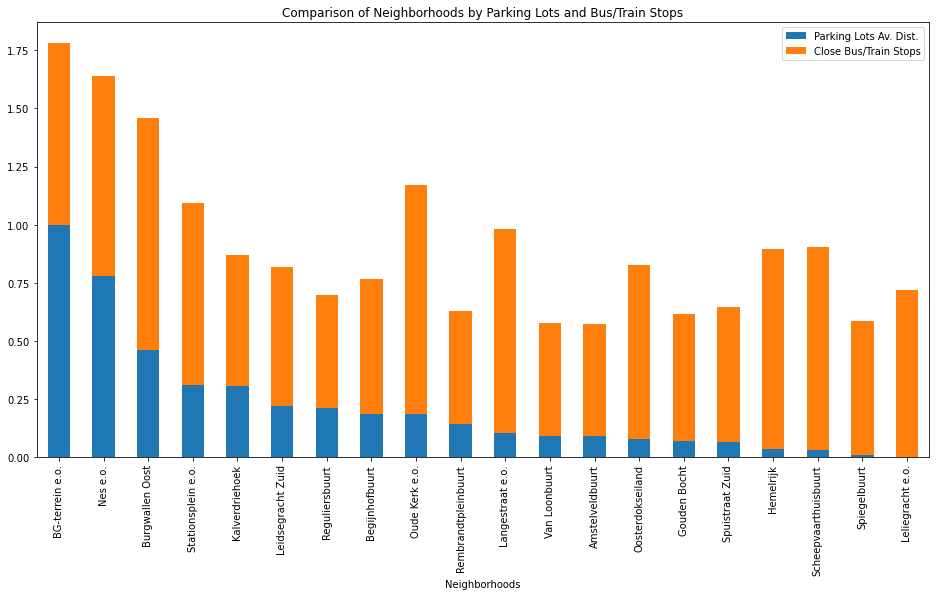

In [43]:
df_comparison.plot.bar(x="Neighborhood", y=["CarPark_Dist_N", "Close_Bus/Train_N"],stacked=True,figsize=(16,8))
plt.xlabel('Neighborhoods') # x-label to the plot
plt.title('Comparison of Neighborhoods by Parking Lots and Bus/Train Stops') # title to the plot
plt.legend(('Parking Lots Av. Dist.', 'Close Bus/Train Stops'),loc=1) #legend of the plot
plt.show()

__Lastly, get the comparison result__ and save the result in a new dataframe as *df_result*

In [44]:
df_comparison['Total']=df_comparison['CarPark_Dist_N']+df_comparison['Close_Bus/Train_N'] #create a new column
df_result=(df_comparison[df_comparison['Total'] == df_comparison['Total'].max()]).reset_index(drop=True) #return the max value and create a 
df_result

,Neighborhood,City,Latitude,Longitude,CarPark_Dist,Close_Bus/Train,CarPark_Dist_N,Close_Bus/Train_N,Total
0,BG-terrein e.o.,Amsterdam,52.369546,4.895584,1450.21,50,1.0,0.78125,1.78125


__The result,__

In [45]:
print('The best neighborhood for a new restaurant in Amsterdam is : {}'.format(df_result.at[0,'Neighborhood']))

The best neighborhood for a new restaurant in Amsterdam is : BG-terrein e.o.


There detail of parking lots which are below 500 meters distance

In [46]:
n=0
m=0
for m in range(df_park['name'].count()):
    location1=list(df_result.loc[0,'Latitude':'Longitude'])
    location2=list(df_park.loc[m,'lat':'lng'])
    dist=float('%.2f' % geodesic(location1,location2).m)
    #dist_list.append(dist)
    if dist<500:
        n+=1
        print('Between {} and {} is {} meters'.format((df_result.loc[0,'Neighborhood']),(df_park.at[m,'name']),dist))
    else:
        continue
print('There are {} parking lots exist in {} below 500 meters distance'.format(n,df_result.at[0,'Neighborhood']))

Between BG-terrein e.o. and MobyPark - Parking Dam Square - Book now and pay only € 3/h! is 392.96 meters
Between BG-terrein e.o. and Parkeergarage Geelvinck is 429.25 meters
Between BG-terrein e.o. and ParkBee Grand Hotel Krasnapolsky is 384.88 meters
Between BG-terrein e.o. and ParkBee is 166.59 meters
Between BG-terrein e.o. and Parking wijdesteeg is 457.57 meters
Between BG-terrein e.o. and ParkBee Kalverstraat is 406.77 meters
Between BG-terrein e.o. and ParkBee Hotel NH City Centre Amsterdam is 455.81 meters
Between BG-terrein e.o. and De Overkant (van MdB) is 210.57 meters
Between BG-terrein e.o. and Q-park Kalverpassage is 387.52 meters
Between BG-terrein e.o. and Fietsenstallingen Singel is 435.3 meters
Between BG-terrein e.o. and Amstel is 303.19 meters
Between BG-terrein e.o. and Parkeergarage Stadhuis-Muziektheater is 398.65 meters
Between BG-terrein e.o. and Parkking The Bank Rembrandtplein is 403.97 meters
Between BG-terrein e.o. and Dam is 425.3 meters
Between BG-terrein

Finally, we can create a map of Amsterdam with;
- The result (best neighborhood) as RED circle marker
- Parking Lots as BLUE circle markers
- Light Rail/Metro/Train/Tram/Bus Stations as ORANGE circle markers

In [47]:
result_latitude=df_result.at[0,'Latitude']
result_longitude=df_result.at[0,'Longitude']
result_name=df_result.at[0,'Neighborhood']

result_map = folium.Map(location=[ams_latitude, ams_longitude], zoom_start=14) # generate map centred around Ecco


# show neighborhood as a red circle mark
folium.features.CircleMarker(
    [result_latitude, result_longitude],
    radius=10,
    popup=result_name,
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(result_map)


# add Parking Lots to the map as blue circle markers
for lat, lng, label in zip(df_park.lat, df_park.lng, df_park.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(result_map)
    

# add Light Rail/Metro/Train/Tram/Bus Station to the map as orange circle markers
for lat, lng, label in zip(df_trans_tot.lat, df_trans_tot.lng, df_trans_tot.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='orange',
        fill_color='orange',
        fill_opacity=0.6
        ).add_to(result_map)

# display map
result_map

### Result of the Project:

As we mentioned before, in this project, we want to determine the best neighborhood in Amsterdam for the entrepreneurs to open a new restaurant. For this aim, firstly, we get the (free and public) "_boroughs and neighborhoods list_" of Amsterdam from the "Statistics Netherlands" (Centraal Bureau voor de Statistiek-CBS). In the dataset __there there are 479 neighborhoods (buurt) and 99 boroughs (wijk) exist in Amsterdam with their geolocations__. We continue to project with 479 neighborhoods list.

For comparison between the neighborhoods, we need "Parking Lots" list and "Light Rail/Metro/Train/Tram/Bus Station list" with their geolocations. We get these datas via Foursquare Api. In Foursquare web site, we learned that the categoryId of our venues' (Parking, Light Rail Station, Metro Station, Tram Station and Bus Station) categoryIds and use these Ids to get and create the datasets. As we know, Foursquare API has a response limit (the number of venues returned by Foursquare API has a maximum limit is 100) of queries. Because of there are more than 100 Bus/Train Stops in Amsterdam, we tried to send query with sub-categoryIDs of venues and update the dataframe with "for loop" with 3000 meters radius easily. The result is;
- 88 Parking Lots
- 168 Light Rail/Metro/Train/Tram/Bus Stations

Then, we calculate the average distance of all "parking lot"  for each neighborhood and calculate the total "Light Rail/Metro/Train/Tram/Bus Station number" below than 1000meters for each neighborhood. Of course, we add the result the main dataframe (df_amsterdam).

Before starting to compare, we normalize the data and then sum up these two new columns and reach the result. In the project; we reach that  in "__The best neighborhood for a new restaurant in Amsterdam is : BG-terrein e.o__". 

The BG-terrein e.o. has;
- 50 Light Rail/Metro/Train/Tram/Bus Stations in 1000 meters distance
- The average distance  for 88 Parking Lots is 1450.21 meters
- There are 15 parking lots exist below 500 meters distance

### Discussion about the Project:

As we mentioned in Introduction; "__It is only a capstone final project and it is not claimed that the result of the project is 100% proper for trade and investing industry.__" The project framework needs more thinking and planning with systematically. And also the project needs more datasets, field and market research.

Firstly, distance from parking lots and train/bus stations can't be the only factor for selecting a restaurant location. We need different type of data like usage density of every streets, frequently preferred routes and the preferred reason... etc. 

Secondly, parking lots capacity also an important detail. Maybe a restaurant has 3 parking lots in too close distance but they haven't got enough parking lot capacity so most of time it has no free parking lot. So here 3 close parking lots couldn't add positive effect to make a decision. So, before starting to project, field research and/or the tips of parking lots also be keep in views.

Thirdly, taxes are another an important factor in determining the best location. So, we need extra datasets.

Also, if we know the closed/moved restaurants information in earlier, we can add these factor to the project. Although the good location (close the parking lots, stations, etc.) but people maybe don't select it because of another reason (bad smell in the area, construction in the street, closely a loud venue). 

So the project has insufficiencies.

On the other hand, the project can be helpful in the decision process for the entrepreneurs and/or give an idea to make a comprehensive project to researchers.

### Conclusion of the Project:

This project is a "Capstone Project" of Coursera - "IBM Applied Data Science Capstone Course". In the project, we tried to use most of the python scripts, libraries, virtualization of data, foursquare api.. etc. So our first aim is to use them in a systematically.

In this project, we want to determine the best neighborhood in Amsterdam for the entrepreneurs to open a new restaurant. We compare the the 479 neighborhoods in Amsterdam with "the average distance of all parking lot" and "the total Light Rail/Metro/Train/Tram/Bus Station number below than 1000meters". 

After compare the neighborhoods with these two factor, we reach that "__The best neighborhood for a new restaurant in Amsterdam is : Nes e.o.__"
<br>The Nes e.o. has;
- 55 Light Rail/Metro/Train/Tram/Bus Stations in 1000 meters distance
- The average distance for 62 Parking Lots is 1388.64 meters
- There are 15 parking lots exist below 500 meters distance

Although the insufficiencies (the project needs more datasets, field and market research), we think that the project give an idea to researchers to make a comprehensive project in future works.